## Задание первое

Спрогнозировать значение UDP Throughput для сетевого устройства №3, имеющего параметры: 
•	Тактовая частота процессора: 2 000 ГГц. 
•	Утилизация процессора: 40%.
•	Температура процессора: 54 °С.

In [1]:
#Импорт необходимых библиотек
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#Загрузка изначальных данных
df = pd.read_excel(r'C:\Users\Maxim\Desktop\testovoe.xlsx')
init_data = pd.read_excel(r'C:\Users\Maxim\Desktop\testovoe_init.xlsx')

In [3]:
df.sort_values('udp').sort_values('ghz').reset_index(drop=True)

,ghz,udp,utilization,t
0,1500,600,50,38
1,1500,650,55,45
2,1500,700,60,52
3,1500,750,65,60
4,1500,900,70,67
5,2600,600,30,28
6,2600,750,35,30
7,2600,800,40,31
8,2600,850,45,32
9,2600,900,50,33


Данных изначально мало, обучить что-то кроме линейной регрессии не получится, нужно проверить наличие линейных зависимостей.

Видим, что в данных присутствует зависимость между значениями тактовой частоты ЦП, UDP, утилизацией ЦП и его температурой. Выведем эти значения для кажной тактовой частоты по отдельности.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

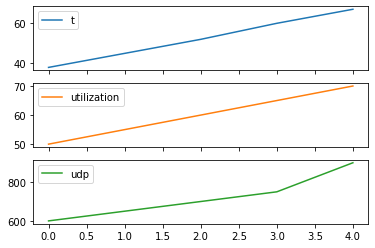

In [4]:
df.sort_values('udp').sort_values('ghz')[['t', 'utilization','udp']].reset_index(drop=True)[:5].plot(subplots=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

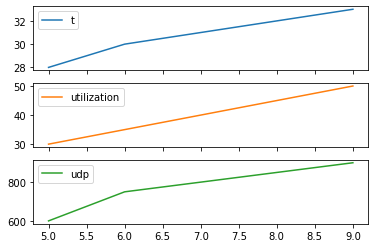

In [5]:
df.sort_values('udp').sort_values('ghz')[['t', 'utilization','udp']].reset_index(drop=True)[5:].plot(subplots=True)

Видим что зависимость есть и она линейна. Убедимся в этом, построив гистограмму

<AxesSubplot:xlabel='udp'>

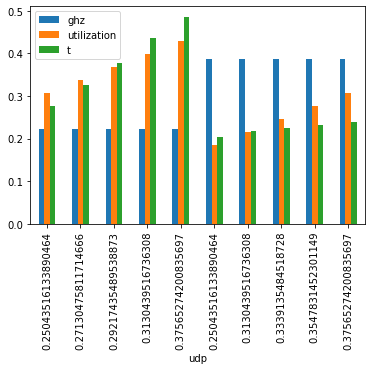

In [6]:
norm_df = pd.DataFrame(preprocessing.normalize(df, axis=0), columns=df.columns)
norm_df.sort_values('udp').sort_values('ghz').plot.bar(x="udp", y=["ghz", "utilization", "t"])

А так же для наглядности тепловую корреляционную матрицу 

<AxesSubplot:>

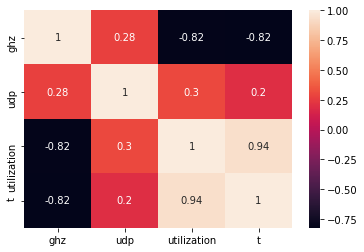

In [24]:
sns.heatmap(df.corr(), annot = True)

In [9]:
train=df.drop('udp', axis=1)
test = df.udp

In [10]:
regressor = LinearRegression()
regressor.fit(train, test)

LinearRegression()

Обучаем нашу линейную модель и получаем результат примерно в 600 UDP

In [11]:
regressor.predict(init_data)

array([598.9772423])

## Вторая часть первого задания

Спрогнозировать значения утилизации ЦП и температуры ЦП сетевого устройства №4 с тактовой частотой 1 700 ГГц для значений UDP Throughput от 50 до 500 с шагом в 50

In [48]:
init_data = pd.read_excel(r'C:\Users\Maxim\Desktop\testovoe_2.xlsx') 
init_data #Загрузка новых данных

,ghz,udp
0,1700,50
1,1700,100
2,1700,150
3,1700,200
4,1700,250
5,1700,300
6,1700,350
7,1700,400
8,1700,450
9,1700,500


In [49]:
df.sort_values('t').sort_values('ghz').reset_index(drop=True) #Вспомним какие данные у нас уже есть

,ghz,udp,utilization,t
0,1500,600,50,38
1,1500,650,55,45
2,1500,700,60,52
3,1500,750,65,60
4,1500,900,70,67
5,2600,600,30,28
6,2600,750,35,30
7,2600,800,40,31
8,2600,850,45,32
9,2600,900,50,33


In [50]:
train = df.drop(['utilization','t'], axis=1) #Разобьем их для обучения
test = df.drop(['ghz','udp'], axis=1)

In [51]:
regressor.fit(train, test) #Линейные зависимости не изменились и данных все еще мало, поэтому используем линейную регрессию

LinearRegression()

Окрулив, получаем вот такую табличку

In [52]:
predict = pd.DataFrame(np.round(regressor.predict(init_data)), columns=df.columns[2:])
predict = pd.concat([init_data, predict], axis=1)
predict

,ghz,udp,utilization,t
0,1700,50,11.0,10.0
1,1700,100,15.0,13.0
2,1700,150,18.0,16.0
3,1700,200,21.0,18.0
4,1700,250,25.0,21.0
5,1700,300,28.0,24.0
6,1700,350,31.0,27.0
7,1700,400,35.0,30.0
8,1700,450,38.0,33.0
9,1700,500,41.0,35.0


Как видно ниже, с ростом загрузки ЦП и, как следствие, температуры, растет и значение UDP. 
Рост равномерный.

<AxesSubplot:xlabel='udp'>

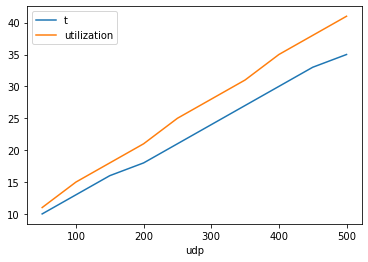

In [53]:
predict[['t', 'utilization','udp']].plot(x='udp')

## Второе задание

На основании данных выше, можно найти закономерноности между ростом тактовой частоты(GHZ), значениями утилизации ЦП и его температуры, соответственно при неизменном значении udp, который по требованиям у нас должен быть минимум 900, можно найти GHZ соответствующее минимальным требованиям к утройству.

In [18]:
init_2 = pd.DataFrame({'ghz':[i for i in range(1500,2700,100)], 'udp':[900 for i in range(1500,2700,100)]})
init_2

,ghz,udp
0,1500,900
1,1600,900
2,1700,900
3,1800,900
4,1900,900
5,2000,900
6,2100,900
7,2200,900
8,2300,900
9,2400,900


In [41]:
train = df[df.udp==900].drop(['utilization','t'], axis=1)
test = df[df.udp==900].drop(['ghz','udp'], axis=1)
regressor.fit(train, test)

LinearRegression()

In [42]:
predict_2 = pd.DataFrame(np.ceil(regressor.predict(init_2)), columns=df.columns[2:])#
df_2 = pd.concat([init_2, predict_2], axis=1)
df_2 = df_2[df_2.utilization<=80]
df_2 = df_2[df_2.t<=60]
df_2.reset_index(drop=True)

,ghz,udp,utilization,t
0,1800,900,65.0,58.0
1,1900,900,63.0,55.0
2,2000,900,61.0,52.0
3,2100,900,60.0,49.0
4,2200,900,58.0,46.0
5,2300,900,56.0,43.0
6,2400,900,54.0,40.0
7,2500,900,52.0,37.0
8,2600,900,50.0,33.0


Таким образом, мы видим, что устройство достигает UDP Throughput не менее 900 Мбит/с, при этом не перегреваясь и не перерабатывая, при значениях GHZ не менее 1800 ГГц

Проведение тестирования.

Поскольку в изначальных данных видно, что с каждым измерением устройство меняло свои значения. Соотвественно для правильного тестирования нужно проводить как минимум 5 измерений. Исходя из нашего исследования, устройства со значением тактовой частоты ЦП менее 1800 ГГц можно отбрасывать сразу же. 
Остальные следует:
    Нагрузить устройство, например, передачей файлов, достаточно больших для проведения нескольких измерений;
    Измерять соответственно тактовую частоту устройства, процент утилизации ЦП и его температуру;
    При недостижении устройством значений UDP Throughput в 900 Мбит/с признать устройство не прошедшим тестирование;
    При превышении значений утилизации ЦП в 80% или его температуры в 60°С также следует признать устройство не прошедшим тестирование.

Тестирование следует проводить в реальных условиях или условиях немного превышающих условия при эксплуатации. Например, устройство скорее всего не будет находиться во влажном, холодном или черезчур горячем климате. При тестировании устройств, например в холодном климате, данные по температуре будут нежелательно искажены в меньшую сторону. Тестирование же, напротив, в слегка жарком помещении позволит выявить те устройства, которые при случайном, но все-таки возможном перегреве (например за счет других устройств вблизи) будут давать нежелательные сбои в работе. Если же непредвиденных ситуаций в местах эксплуатации точно не будет, тестировать следует в обычных условиях.



На основе представленных данных дайте собственные определения понятиям "метод измерения производительности" и "методика нагрузочного тестирования"

Метод измерения производительности - система определенных способов и приемов, позволяющих определить способность устройств к определенной нагрузке при определенных условиях

Методика нагрузочного тестирования - система определенных способов и приемов, позволяющих определить какие из устройств способны к определенной нагрузке при определенных условиях